In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
## Print the shapes of all the data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

## Print the dataypes of all the data
print(train_images.dtype)
print(train_labels.dtype)
print(test_images.dtype)
print(test_labels.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8
uint8
uint8
uint8


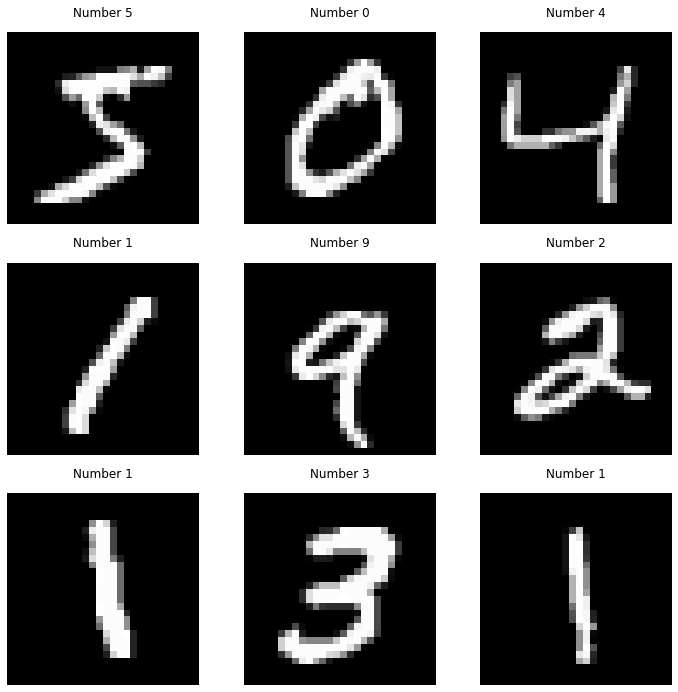

<Figure size 720x648 with 0 Axes>

In [4]:
## Creating a plot to actually display some of the images
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()
plt.figure(figsize = (10,9))

# print the imaages and labels
for i, ax in enumerate(axs.flat):
  ax.matshow(train_images[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(train_labels[i]))

fig.show()

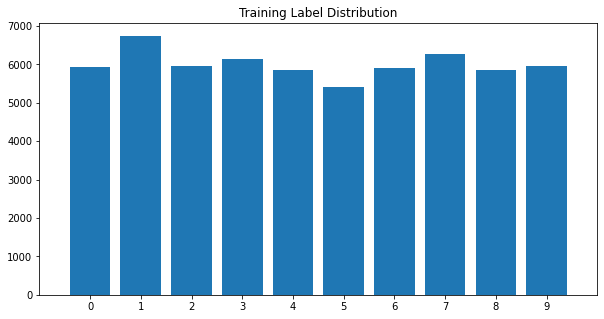

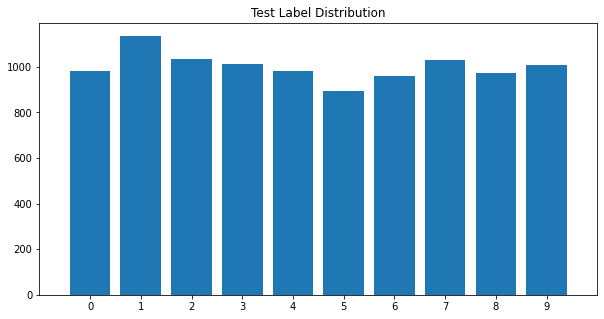

In [5]:
# count number of bins we will need for training label histogram
counts = np.bincount(train_labels)

# plot training labels
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(range(10), counts, width=0.8, align='center')
ax.set(xticks=range(10), xlim=[-1, 10], title='Training Label Distribution')

plt.show()

# get count for test labels
counts = np.bincount(test_labels)

# plot test labels
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(range(10), counts, width=0.8, align='center')
ax.set(xticks=range(10), xlim=[-1, 10], title='Test Label Distribution')

plt.show()

In [6]:
# this variable just tells us that we are predicting 10 digits
num_classes = 10

# specify the input shape
inputs = keras.Input(shape=(28, 28, 1))

## feature extraction
# have two convolutional layers and two pooling layers
layer1 = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu') (inputs)
layer2 = layers.MaxPooling2D() (layer1)
layer3 = layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu') (layer2)
layer4 = layers.MaxPooling2D() (layer3)

# must flatten our data into a vector to input it into the dense neural network
flattenlayer = layers.Flatten() (layer4)
# the dropout function allows for better generality 
droplayer = layers.Dropout(0.5) (flattenlayer)

## dense neural network with two layer (one is our output)
dense1 = layers.Dense(256, activation='relu') (droplayer)
outputs = layers.Dense(num_classes, activation="softmax") (dense1)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0     

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

print("training shape:", train_images.shape)
print(train_images.shape[0], "train samples")
print(train_images.shape[0], "test samples")

training shape: (60000, 28, 28, 1)
60000 train samples
60000 test samples


In [8]:
model.compile(
  optimizer='adam',
  loss="sparse_categorical_crossentropy",
  metrics=['accuracy'])

In [9]:
epochs = 10
batch_size = 256

history = model.fit(train_images, train_labels, epochs=epochs, batch_size = batch_size, validation_split=0.1)

Epoch 1/10
211/211 [==============================] - 59s 265ms/step - loss: 0.3311 - accuracy: 0.8983 - val_loss: 0.0749 - val_accuracy: 0.9785
Epoch 2/10
211/211 [==============================] - 45s 212ms/step - loss: 0.0959 - accuracy: 0.9703 - val_loss: 0.0456 - val_accuracy: 0.9868
Epoch 3/10
211/211 [==============================] - 46s 218ms/step - loss: 0.0702 - accuracy: 0.9777 - val_loss: 0.0405 - val_accuracy: 0.9892
Epoch 4/10
211/211 [==============================] - 44s 210ms/step - loss: 0.0570 - accuracy: 0.9824 - val_loss: 0.0361 - val_accuracy: 0.9897
Epoch 5/10
211/211 [==============================] - 44s 211ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0329 - val_accuracy: 0.9913
Epoch 6/10
211/211 [==============================] - 47s 223ms/step - loss: 0.0434 - accuracy: 0.9864 - val_loss: 0.0330 - val_accuracy: 0.9903
Epoch 7/10
211/211 [==============================] - 44s 210ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0319 - val_ac

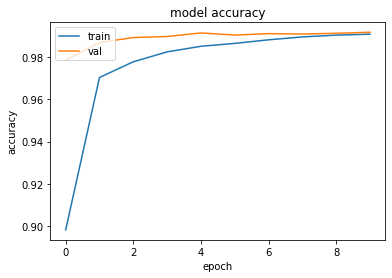

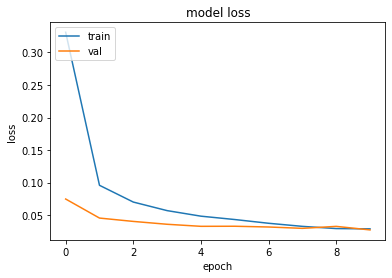

In [15]:
# plot the model validation and training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot the model validation loss and training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
# evaluate the model on our test data
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025903815403580666
Test accuracy: 0.9916999936103821


313/313 [==============================] - 4s 11ms/step


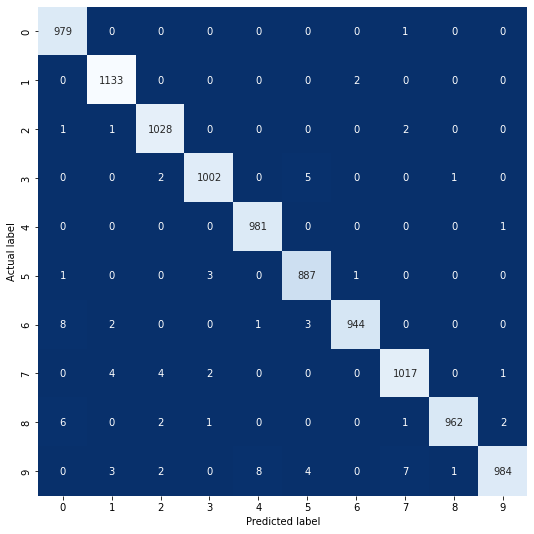

In [12]:
# create the confusion matrix
pred = model.predict(test_images) # Predict class probabilities

# argmax() returns the indices of the maximum values along an axis
test_pred = np.argmax(pred, 1) # Decode Predicted labels

mat = confusion_matrix(test_labels, test_pred) # Confusion matrix
# Plot Confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(mat, annot=True, fmt=".0f", square = True, cmap = 'Blues_r', cbar = False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [13]:
model.save("model.h5")

In [ ]:
!pip install tensorflowjs 

In [ ]:
!mkdir model
!tensorflowjs_converter --input_format=keras /content/model.h5 /content/model